# Tarea Examen 1
### Ejercicio 1

## Jonathan Alexis Urrutia Anguiano 414011025|

In [29]:
from numpy import *
from pylab import *
%matplotlib inline
%run "funciones_a_llamar.ipynb"

Esta vez, tenemos una particula en una caja que rebotará cada vez que choque con la misma. Le ecuación de movimiento es la siguiente, asumiendo que hay un modelo de fricción:
$$
\left(\begin{array}{c}\dot u_1 \\ \dot v_1 \\ \dot u_2\\ \dot v_2\end{array}\right) = \left(\begin{array}{c} u_2 \\ v_2 \\ \frac{1}{m} fric(u_1)\\-g +\frac{1}{m} fric(v_1)\end{array}\right)
$$
Con $u_1 = x,\, u_2 = \dot x, \, v_1 = y\mbox{ y } v_2 = \dot y$

In [30]:
def e_mov(r_v,t,fric=0, g=9.8,m=1):
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = 0,-g
    else:
        dvx = - fric([r_v[2],r_v[3]])[0]/m
        dvy = -g- fric([r_v[2],r_v[3]])[1]/m
    return array([dx,dy,dvx,dvy])

In [31]:
def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y]) 

La caja en donde estará la caja esta compusta de dos planos inclinados con el mismo ángulo de inclinación que se unen en un punto, una longitud total de $5m$ de largo y cuando acaban los planos inlclinados, se eleva hasta $3m$ más sobre ellos. Los angulos de inclinación serán de $\pi/6$ y $\pi/10$ o lo que es lo mismo, $30^\circ$ y $18^\circ$

In [32]:
def plano(x,angulo):
    return -tan(angulo*pi/180.)*x

def techo(x,angulo):
    y = zeros(len(x))
    a = 5*tan(angulo*pi/180.)
    y[:] = a + 3
    return y

def pared(pt, angulo):
    a = 5*tan(angulo*pi/180.)
    y = arange(a,a+3,.01)
    x = zeros(len(y))
    x[:] = pt
    return array([x,y])

def caja(x,angulo):
    ang = angulo
    pt_i = x[0]
    pt_f = x[-1]
    
    p = -plano(abs(x), ang)
    t = techo(x, ang)
    der = pared(pt_i,ang)
    izq = pared(pt_f,ang)
    
    return plot(x,p[:], x,t[:], der[0,:],der[1,:], izq[0,:],izq[1,:], color = 'red')

Entonces ya podemos visualisar la caja :

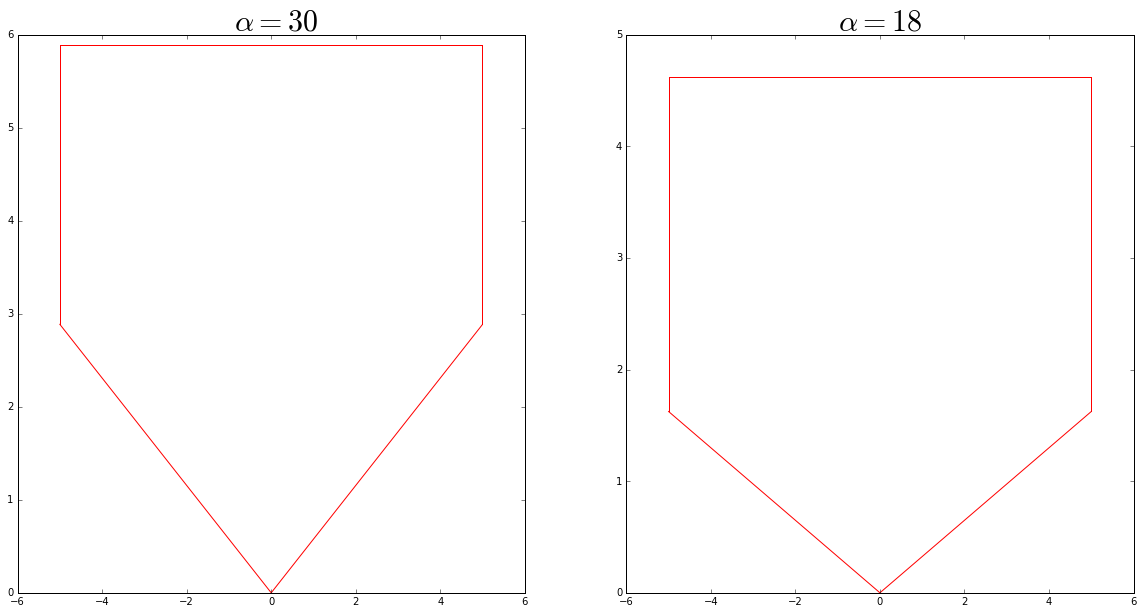

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))

angulos = array([30, 18]) #pi/6, pi/10
equis = arange(-5,5,.01)

subplot(1,2,1)
title(r' $\alpha = %s$' %(str(angulos[0])),fontsize = 30)
caja(equis, angulos[0])

subplot(1,2,2)
title(r'$\alpha = %s$' %(str(angulos[1])),fontsize = 30)
caja(equis, angulos[1])
show()

Para los rebotes, hay que definir los casos para cada una de las cinco fronteras. Siempre son reflexiones en las componentes de la velocidad perpendiculares a la superficies por lo que podemos utilizar la siguiente tranformación lineal para el caso en el que rebote en los planos inclinados. 
$$
\left(\begin{array}{c}x'\\y'\\\dot x'\\\dot y' \end{array}\right) = \left(\begin{array}{c c c c}1 & 0 & 0 & 0\\0& 1& 0 &0 \\0&0& \cos\theta & -\sin\theta\\0&0&\sin\theta & \cos\theta \end{array}\right) \left(\begin{array}{c}x\\y\\\dot x \\ \dot y \end{array}\right) 
$$
Se utilizarará $\theta = \alpha$ si cae en el lado izquierdo o $\theta = -\alpha$. Para el caso del techo o de las paredes no es necesario hacer rotaciones en las velocidades para saber qué componentes son reflejadas.

In [34]:
def rot_vel(ang):
    ang = ang*pi/180.
    return array([1,0,0,0]),array([0,1,0,0]),array([0,0,cos(ang),-sin(ang)]),array([0,0,sin(ang),cos(ang)])

In [35]:
def rebote(r_v_i,mi_dt,ang,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]

    while abs(y_izq[1]-plano(y_izq[0],ang))>1e-5:
        if (y_izq[1]-plano(y_izq[0],ang))*(y_med[1]-plano(y_med[0],ang))<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = dot(rot_vel(ang),y_izq)
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

In [36]:
def rebote_techo(r_v_i,mi_dt,ang,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]
    tope_y = 3 + 5*tan(angulo*pi/180.)

    while abs(y_izq[1]-tope_y)>1e-5:
        if (y_izq[1]-tope_y)*(y_med[1]-tope_y)<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = dot(rot_vel(ang),y_izq)
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

In [37]:
def rebote_pared(r_v_i,mi_dt,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]
    pared = sign(y_izq[0])*5

    while abs(y_izq[0]-pared)>1e-5:
        if (y_izq[0]-pared)*(y_med[0]-pared)<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
        pared = sign(y_izq[0])*5
    y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])
    return y_izq

In [38]:
def datos_graf(cond_ini, ang, modelo_fric=0,pts=100, dt=0.1):
    N = pts
    inicio = cond_ini
    trayectoria = zeros((N,len(inicio)))
    mi_dt = dt
    trayectoria[0,:] = array(inicio)
    tope_y = 3 + 5*tan(angulo*pi/180.)
    
    for i in range(N-1):
        t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt], modelo_fric)
    
        if sol_dt[-1,:][0]<=0 and sol_dt[-1,:][1]-plano(sol_dt[-1,:][0], ang) < 0:
            y_izq = rebote(trayectoria[i,:],mi_dt,ang)    
            trayectoria[i+1,:] = y_izq
        elif sol_dt[-1,:][0] > 0 and sol_dt[-1,:][1]-plano(sol_dt[-1,:][0], -ang) < 0:
            y_izq = rebote(trayectoria[i,:],mi_dt,-ang)    
            trayectoria[i+1,:] = y_izq
        elif sol_dt[-1,:][1] >= tope_y:
            y_izq = rebote_techo(trayectoria[i,:],mi_dt,0)    
            trayectoria[i+1,:] = y_izq
        elif 5 <= abs(sol_dt[-1,:][0]):
            y_izq = rebote_pared(trayectoria[i,:],mi_dt,0)    
            trayectoria[i+1,:] = y_izq
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]
    return trayectoria

In [39]:
modelos = [0 , fric_v,]
etiquetas = ['Sin friccion','Proporcinal a V']

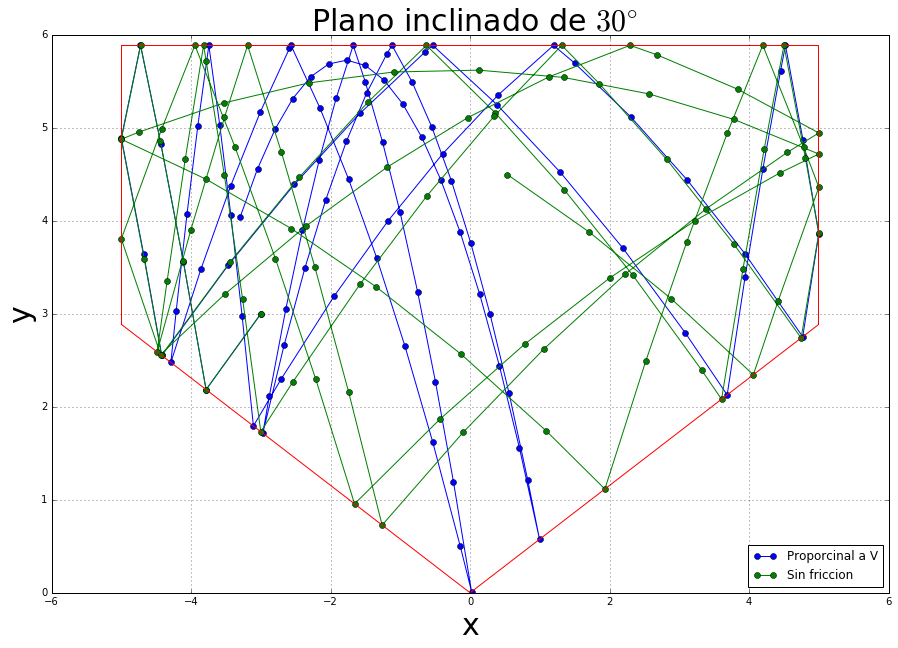

In [41]:
inicio = [-3,3, -10,-10 ]
angulo = 30

fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title(r' Plano inclinado de $30^{\circ}$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

for i in xrange(len(modelos)):
    trayectoria = datos_graf(inicio,angulo,modelos[1-i])
    plot(trayectoria[:,0],trayectoria[:,1],'o-', label = str(etiquetas[1-i]))
caja(equis, angulo)
ax.legend(loc='lower right')
show()

In [22]:
def piso(x,angulo):
    return tan(angulo*pi/180.)*abs(x)

def datos_graf(cond_ini, ang, modelo_fric=0,pts=100, dt=0.1):
    N = pts
    inicio = cond_ini
    trayectoria = zeros((N,len(inicio)))
    mi_dt = dt
    trayectoria[0,:] = array(inicio)
    for i in range(N-1):
        t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt], modelo_fric)
    
        if sol_dt[-1,:][1]-piso(sol_dt[-1,:][0], ang) < 0:
            y_izq = rebote(trayectoria[i,:],mi_dt,ang)    
            trayectoria[i+1,:] = y_izq
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]
    return trayectoria

def rebote(r_v_i,mi_dt,ang,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]

    while abs(y_izq[1]-piso(y_izq[0],ang))>1e-5:
        if (y_izq[1]-piso(y_izq[0],ang))*(y_med[1]-piso(y_med[0],ang))<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = dot(rot_vel(ang),y_izq)
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

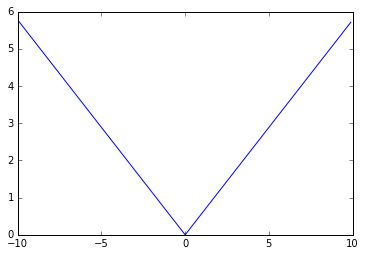

In [23]:
equis = arange(-10,10,.1)
plot(equis, piso(equis,ang))
show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title(r' Plano inclinado de $45^{\circ}$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

modelos = [0 , fric_v]
etiquetas = ['Sin friccion','Proporcinal a V']

for i in xrange(len(modelos)):
    trayectoria = datos_graf([0,1,-1,-1],45,modelos[1-i],500)
    plot(trayectoria[:,0],trayectoria[:,1],'--',label = str(etiquetas[1-i]))
plot(trayectoria[:,0],piso(trayectoria[:,0],45))
ax.legend(loc='upper right')
show()

In [8]:
def rebote_pared(r_v_i,mi_dt,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]
    pared = sign(y_izq[0])*5
    
    while abs(y_izq[0]-pared)>1e-5:
        if (y_izq[0]-pared)*(y_med[0]-pared)<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

In [9]:
def rebote_techo(r_v_i,mi_dt,ang,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]
    
    while abs(y_izq[1]-techo([y_izq[0]],ang))>1e-5:
        if (y_izq[1]-techo([y_izq[0]],ang))*(y_med[1]-techo([y_med[0]],ang))<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

In [10]:
def datos_graf(cond_ini, ang, modelo_fric=0,pts=100, dt=0.1):
    N = pts
    inicio = cond_ini
    trayectoria = zeros((N,len(inicio)))
    mi_dt = dt
    trayectoria[0,:] = array(inicio)
    for i in range(N-1):
        t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt], modelo_fric)
    
        if sol_dt[-1,:][0] < 0 and sol_dt[-1,:][1]-piso(sol_dt[-1,:][0], ang) < 0:
            y_izq = rebote_piso(trayectoria[i,:],mi_dt,ang)    
            trayectoria[i+1,:] = y_izq
        elif sol_dt[-1,:][0] > 0 and sol_dt[-1,:][1]-piso(sol_dt[-1,:][0], ang) < 0:
            y_izq = rebote_piso(trayectoria[i,:],mi_dt,-ang)    
            trayectoria[i+1,:] = y_izq
        elif 5 < abs(sol_dt[-1,:][0]):
            y_izq = rebote_pared(trayectoria[i,:],mi_dt,ang)    
            trayectoria[i+1,:] = y_izq        
        elif sol_dt[-1,:][1] > techo([sol_dt[-1,:][1]],ang):
            y_izq = rebote_techo(trayectoria[i,:],mi_dt,ang)    
            trayectoria[i+1,:] = y_izq        
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]
    return trayectoria

In [13]:
modelos = [0 , fric_v]
etiquetas = ['Sin friccion','Proporcinal a V']

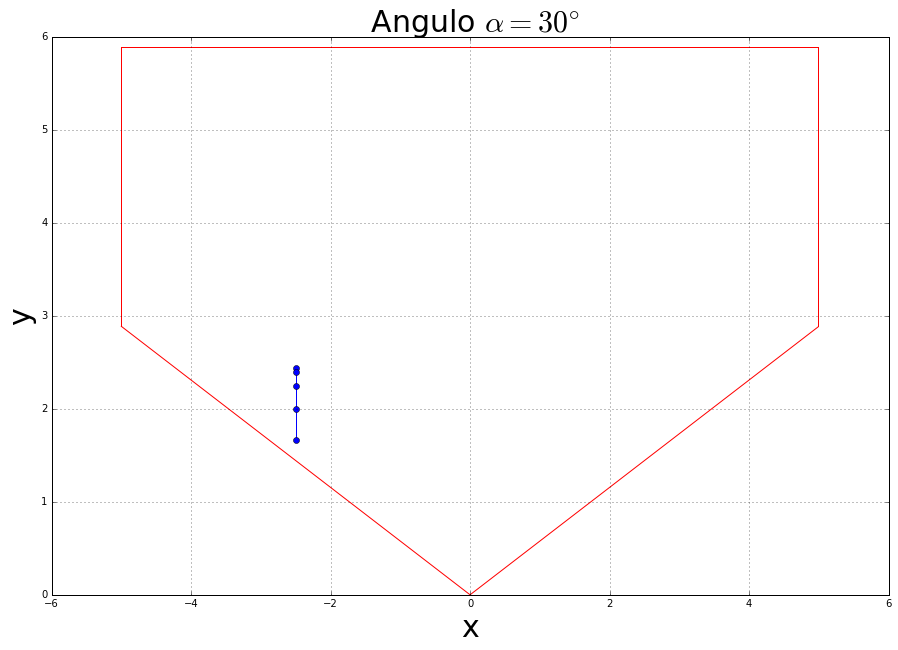

In [15]:
angulo = 30*pi/180
inicio = [-2*5*cos(angulo)**2/3, 5*sin(2*angulo)/3+1,0,0]
angulo = 30

fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title(r' Angulo $\alpha = 30^{\circ}$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

trayectoria = datos_graf(inicio,angulo,0,5)
plot(trayectoria[:,0],trayectoria[:,1],'o-')
caja(equis, angulo)
show()

In [ ]:
piso([10],15)